In [1]:
import numpy as np
import io
import sys
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import math
from scipy import stats

%matplotlib inline

In [2]:
n_path = 'Examples/australia/xrun_6/realtime_data/'
o_path = 'Examples/australia/xrun_6/realtime_data/'

In [3]:
old_elev = pickle.load(open("%s/0/pred_elev_vec.pkl"%(o_path), "rb" ) )
old_erdp = pickle.load(open("%s/0/pred_erodep_vec.pkl"%(o_path), "rb" ) )
old_elev_pts = pickle.load(open("%s/0/pred_elev_pts_vec.pkl"%(o_path), "rb" ) )
old_erdp_pts = pickle.load(open("%s/0/pred_erodep_pts_vec.pkl"%(o_path), "rb" ) )

new_elev = pickle.load(open("%s/1/pred_elev_vec.pkl"%(n_path), "rb" ) )
new_erdp = pickle.load(open("%s/1/pred_erodep_vec.pkl"%(n_path), "rb" ) )
new_elev_pts = pickle.load(open("%s/1/pred_elev_pts_vec.pkl"%(n_path), "rb" ) )
new_erdp_pts = pickle.load(open("%s/1/pred_erodep_pts_vec.pkl"%(n_path), "rb" ) )

In [4]:
# # print(new_elev.keys())
# print(new_elev[0.0])
# elev = new_elev[0.0]
# elev_selected = np.where((elev >= 0) & (elev <=10))
# print(elev_selected, ' elev_seclected')
# print(new_elev[0.0].shape)
# print(new_erdp.keys())
# print(new_erdp[0.0])
# print(new_erdp[0.0].shape)

In [5]:
# plt.figure(figsize=(10,5))
# sns.heatmap(old_erdp[0.0])

# plt.figure(figsize=(10,5))
# sns.heatmap(new_erdp[0.0])

# residual = old_erdp[0.0] - new_erdp[0.0]

# plt.figure(figsize=(10,5))
# sns.heatmap(residual)

# basin = old_erdp[0.0]
# basin = basin[68:104,0:50]
# plt.figure(figsize=(10,5))
# sns.heatmap(basin)

In [6]:

# plt.figure(figsize=(10,5))
# sns.heatmap(old_elev[0.0])


# plt.figure(figsize=(10,5))
# sns.heatmap(new_elev[0.0])

# residual_elev = old_elev[0.0] - new_elev[0.0]
# plt.figure(figsize=(10,5))
# sns.heatmap(residual_elev)

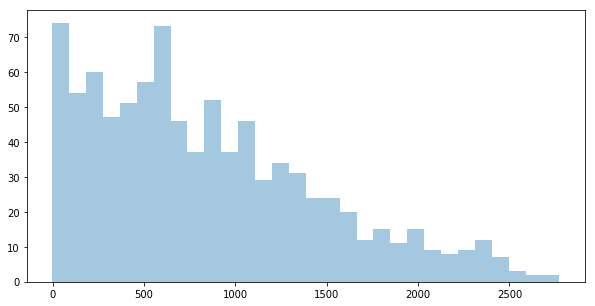

In [7]:
erdp_pts = np.loadtxt('Examples/australia/data/final_erdp_pts_.txt')
plt.figure(figsize=(10,5))
sns.distplot(erdp_pts, bins = 30,kde = False)

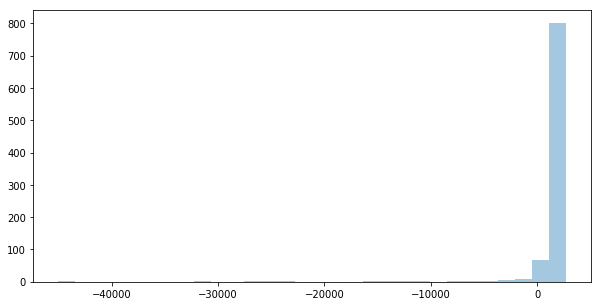

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(old_erdp_pts[0.0],bins = 30, kde = False)

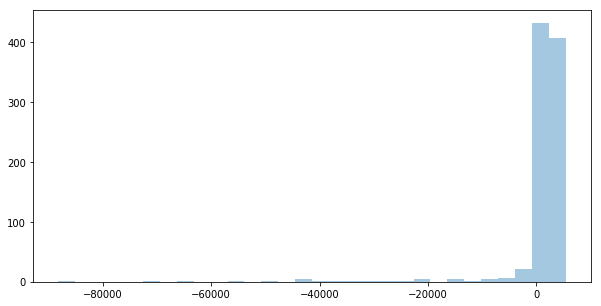

In [9]:
plt.figure(figsize=(10,5))
sns.distplot(new_erdp_pts[0.0], bins = 30, kde = False)

In [10]:
print(erdp_pts.shape, old_erdp_pts[0.0].shape, new_erdp_pts[0.0].shape)

((901,), (901,), (901,))


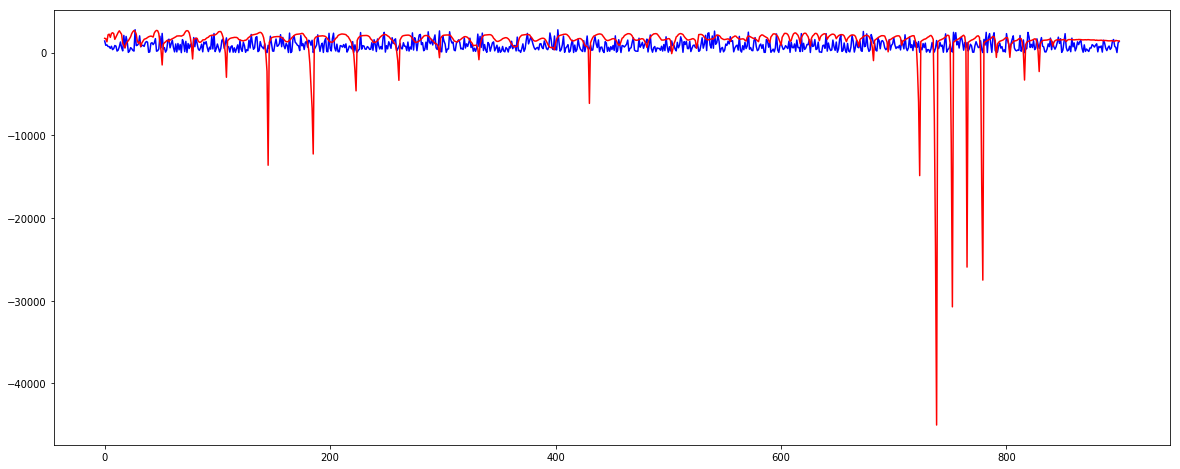

In [11]:
rcParams['figure.figsize'] = 20,8
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(erdp_pts, color = 'b')
ax1.plot(old_erdp_pts[0.0], color = 'r')
# ax1.plot(new_erdp_pts[0.0], color = 'g')
plt.show()

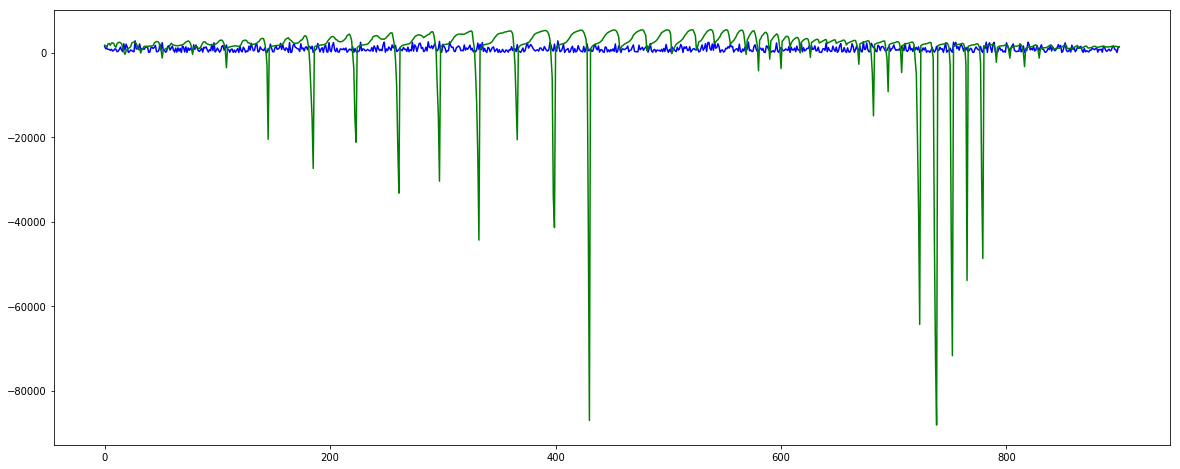

In [12]:
rcParams['figure.figsize'] = 20,8
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(erdp_pts, color = 'b')
# ax1.plot(old_erdp_pts[0.0], color = 'r')
ax1.plot(new_erdp_pts[0.0], color = 'g')
plt.show()

In [13]:
erdp_pts.shape[0]

901

In [14]:
tau_erodep  =  np.sum(np.square(old_erdp_pts[0.0] - erdp_pts))/ erdp_pts.shape[0]

In [15]:
likelihood_erodep  = np.sum(-0.5 * np.log(2 * math.pi * tau_erodep ) - 0.5 * np.square(old_erdp_pts[0.0] - erdp_pts) / tau_erodep )

In [16]:
print(tau_erodep, likelihood_erodep)
rmse = np.sqrt(tau_erodep)
print('rmse = ', rmse)

(8535441.023550028, -8468.325400563848)
('rmse = ', 2921.547710298435)


In [17]:
array = old_erdp_pts[0.0]
array[array < 0] = 0
# array[array < 0] = np.mean(erdp_pts)
# array[array < 0] = np.mode(erdp_pts)


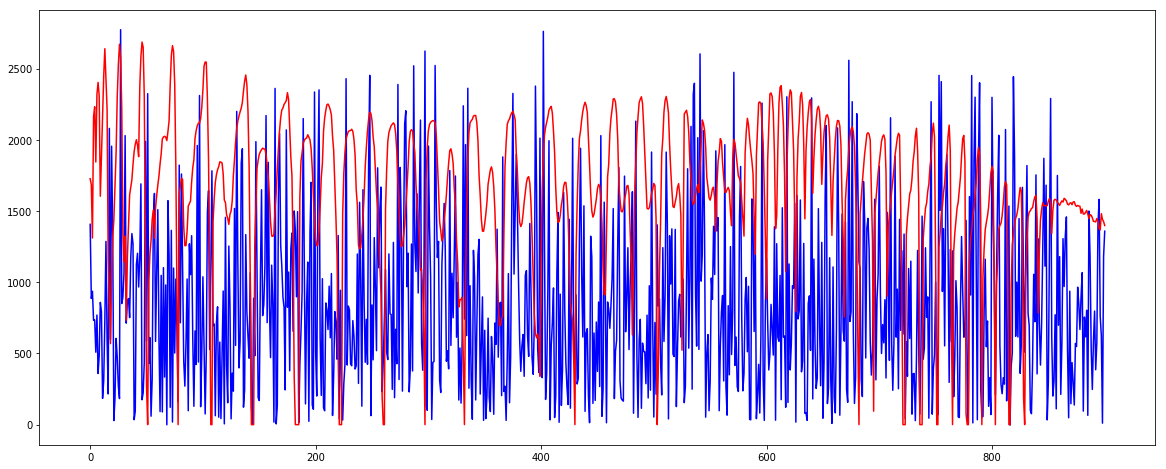

In [18]:
rcParams['figure.figsize'] = 20,8
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(erdp_pts, color = 'b')
ax1.plot(array, color = 'r')
# ax1.plot(new_erdp_pts[0.0], color = 'g')
plt.show()

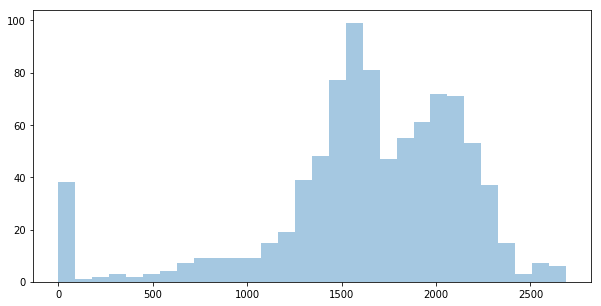

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(array,bins = 30,kde = False)


In [20]:
tau_erodep  =  np.sum(np.square(array - erdp_pts))/ erdp_pts.shape[0]
likelihood_erodep  = np.sum(-0.5 * np.log(2 * math.pi * tau_erodep ) - 0.5 * np.square(array - erdp_pts) / tau_erodep )
print(tau_erodep, likelihood_erodep)
rmse = np.sqrt(tau_erodep)
print('rmse = ', rmse)

(1311015.0673481182, -7624.347289609788)
('rmse = ', 1144.9956625892162)


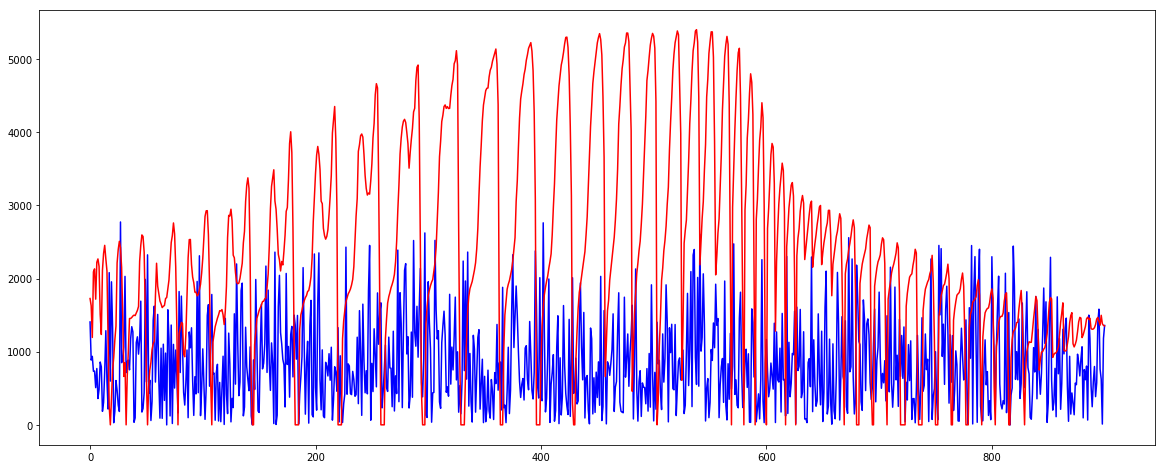

In [21]:

array = new_erdp_pts[0.0]
array[array < 0] = 0
# array[array < 0] = np.mean(erdp_pts)

rcParams['figure.figsize'] = 20,8
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(erdp_pts, color = 'b')
ax1.plot(array, color = 'r')
# ax1.plot(new_erdp_pts[0.0], color = 'g')
plt.show()

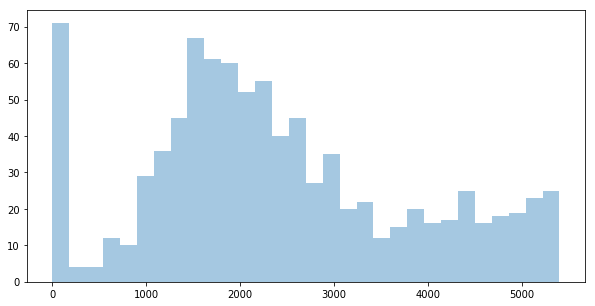

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(array, bins = 30, kde = False)

In [23]:
tau_erodep  =  np.sum(np.square(array - erdp_pts))/ erdp_pts.shape[0]
likelihood_erodep  = np.sum(-0.5 * np.log(2 * math.pi * tau_erodep ) - 0.5 * np.square(array - erdp_pts) / tau_erodep )
print(tau_erodep, likelihood_erodep)
rmse = np.sqrt(tau_erodep)
print('rmse = ', rmse)

(4803176.521201771, -8209.31062694685)
('rmse = ', 2191.615048589001)


In [24]:
print(np.mean(erdp_pts))

846.8514715782463


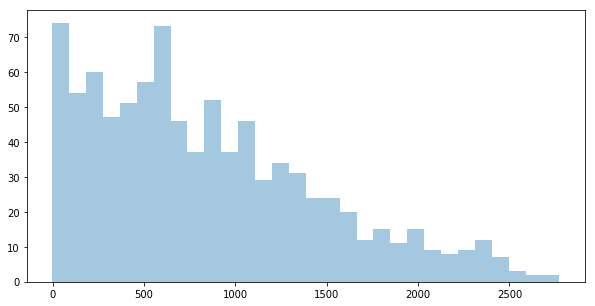

In [25]:
erdp_pts = np.loadtxt('Examples/australia/data/final_erdp_pts_.txt')
plt.figure(figsize=(10,5))
sns.distplot(erdp_pts, bins = 30,kde = False)